<a href="https://colab.research.google.com/github/JavierGonzalezP/EIE_401_MULTIMEDIA/blob/main/Copia_de_Actividad_7_GonzalezJavier_20272244k.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA
</center></font>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/My Drive/Colab Notebooks/

/content/drive/My Drive/Colab Notebooks



<center><h2>Actividad 7</h2></center>
<center><h3>Image</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: _______</h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>


## 1. Operaciones usando Pytorch y OpenCV

### 1.1 Instala Numpy, Pytorch y OpenCV:
- Carga una imagen desde un archivo con extensión JPG, usando numpy, pytorch y opencv.
- Presenta la imagen
- Transforma la imagen de color a escala de grises usando cada uno de los paquetes
- Guarda la imagen nueva.
- Presenta la imagen transformada en el notebook.

<p align="justify">
Asegurate de presentar adecuandamente la imagen, usando Matplotlib u otro medio de ploteo.

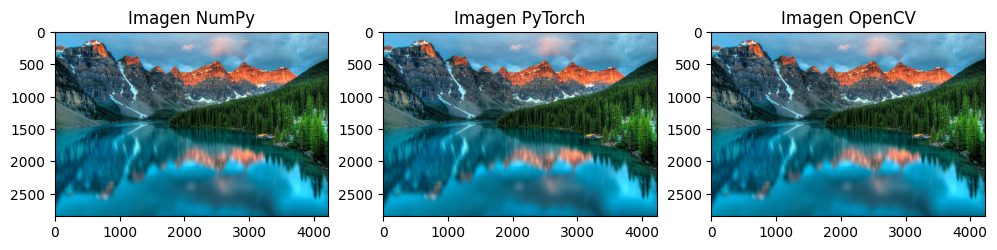

In [ ]:
import numpy as np
from PIL import Image
import torch
from torchvision import io
import torchvision.transforms as T
import cv2
import matplotlib.pyplot as plt

# Numpy
imagen_numpy = np.array(Image.open('paisaje.jpg'))

# PyTorch
imagen_pytorch = io.read_image('paisaje.jpg')
imagen_pytorch = T.ToPILImage()(imagen_pytorch)

# OpenCV
imagen_opencv = cv2.imread('paisaje.jpg')
imagen_opencv_rgb = cv2.cvtColor(imagen_opencv, cv2.COLOR_BGR2RGB)


# Se grafica
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(imagen_numpy)
plt.title('Imagen NumPy')

plt.subplot(1, 3, 2)
plt.imshow(imagen_pytorch)
plt.title('Imagen PyTorch')

plt.subplot(1, 3, 3)
plt.imshow(imagen_opencv_rgb)
plt.title('Imagen OpenCV')

plt.show()


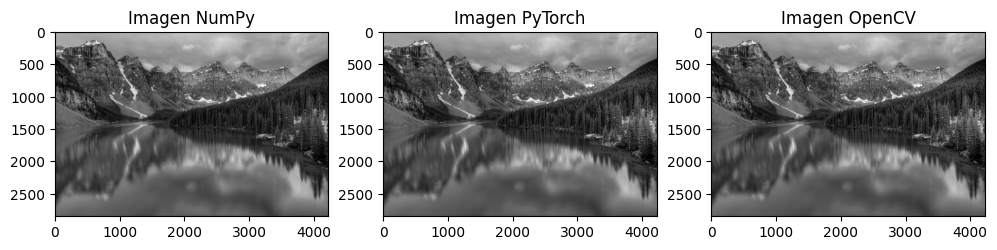

In [ ]:
from torchvision import transforms

# Escala de grises Numpy
imagen_gray_np = np.mean(imagen_numpy, axis=2)
Image.fromarray(imagen_gray_np.astype(np.uint8)).save('imagen_gray_np.png')

# Escala de grises PyTorch
transform = T.Compose([
    T.Grayscale(),
    T.ToTensor(),
])
img_gray_torch = transform(imagen_pytorch)
img_gray_torch_pil = T.ToPILImage()(img_gray_torch)
img_gray_torch_pil.save('imagen_gray_torch.png')

# Escala de grises OpenCV
img_gray_cv2 = cv2.cvtColor(imagen_opencv_rgb, cv2.COLOR_RGB2GRAY)
cv2.imwrite('imagen_gray_cv2.png', img_gray_cv2)

# Se grafica
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(imagen_gray_np, cmap='gray')
plt.title('Imagen NumPy')

plt.subplot(1, 3, 2)
plt.imshow(img_gray_torch_pil, cmap='gray')
plt.title('Imagen PyTorch')

plt.subplot(1, 3, 3)
plt.imshow(img_gray_cv2, cmap='gray')
plt.title('Imagen OpenCV')

plt.show()

## 2. Multiples operaciones con tensores
### ¡USA LA IMAGEN ADJUNTA image.png!

#### 2.1 Aplica una transformación puntual. Modifica el valor de los pixeles considerando un valor de umbral (threshold). la función de treshold debe ser una rampa con una pendiente dada (tu defines el valor de la pendiente) y cuyo valor mínimo será 0 y el máximo será 255 (valores típicos de los pixeles).

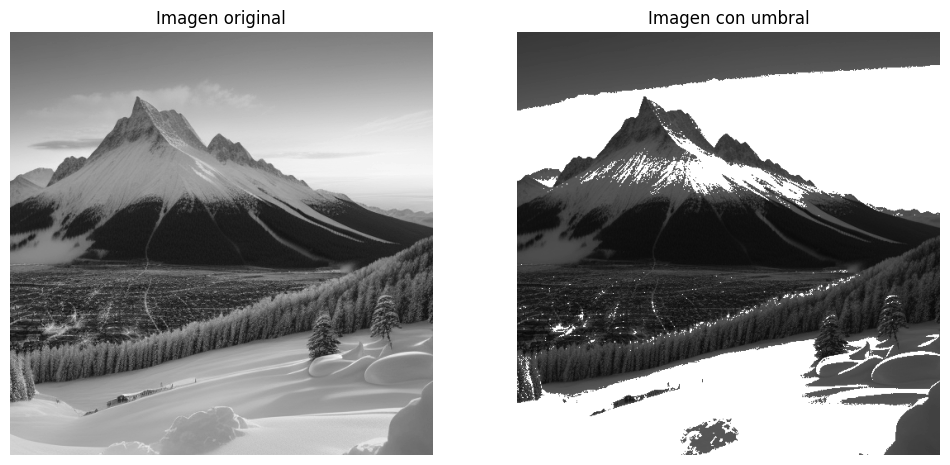

In [ ]:
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen
image = cv2.imread('image.png')

# Convertir la imagen a escala de grises
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Pendiente de la rampa
slope = 0.7

# Función de umbral
def threshold_function(x):
  if x < 128:
    return x * slope
  else:
    return 255

# Aplicar la función de umbral a la imagen
thresholded_image = np.zeros_like(gray_image)
for i in range(gray_image.shape[0]):
  for j in range(gray_image.shape[1]):
    thresholded_image[i, j] = threshold_function(gray_image[i, j])

# Mostrar la imagen original y la imagen con umbral
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Imagen original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(thresholded_image, cmap='gray')
plt.title('Imagen con umbral')
plt.axis('off')

plt.show()


#### 2.2 Aplica una transformación en la vecindad.
- Debes hacer una vecindad con dimensiones de 5x5 pixeles.
- Aplica la transformación de tal forma que los pixeles cambien para tener el valor correspondiente al máximo de todos los vecinos.
- Debes hacer la misma operación a lo largo y ancho de toda la imagen. ESto implica, de forma iterativa, recorrer la imagen.



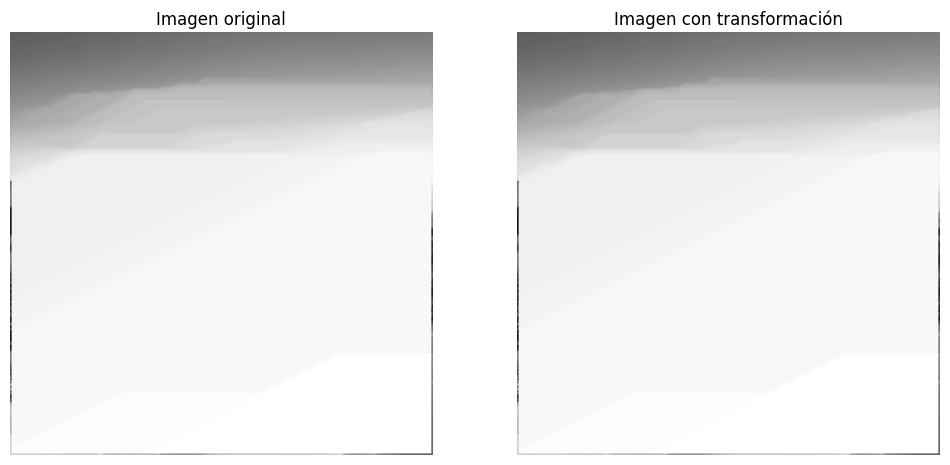

In [ ]:
# Crear una vecindad de 5x5 pixeles
kernel = np.ones((5, 5), dtype=np.uint8)

# Iterar sobre la imagen
for i in range(2, gray_image.shape[0] - 2):
  for j in range(2, gray_image.shape[1] - 2):
    # Obtener la vecindad
    neighborhood = gray_image[i - 2:i + 3, j - 2:j + 3]

    # Obtener el valor máximo de la vecindad
    max_value = np.max(neighborhood)

    # Asignar el valor máximo al pixel actual
    gray_image[i, j] = max_value

# Mostrar la imagen original y la imagen con la transformación
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Imagen original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gray_image, cmap='gray')
plt.title('Imagen con transformación')
plt.axis('off')

plt.show()


#### 2.3 Aplica transformación de intensidad
![image.png](attachment:image.png)
- Debes hacer una vecindad con dimensiones de 10x10 pixeles.
- Aplica la transformación que aparece en la ecuación de tal forma que los pixeles cambien dependiendo de la posición (r) y el coeficiente c (de tu elección).
- Debes hacer la misma operación a lo largo y ancho de toda la imagen. ESto implica, de forma iterativa, recorrer la imagen.

#### 2.4 Operación con Kernel
- Realiza tres operaciones de convolución en cascada.
- Utiliza torch nn.Conv2d
- Debes calcular el stride, padding y demás parámetros para que obtengas 16 canales de salida.
- Muestra una imagen de cada canal resultante de la convolución.

## 3. Realiza la inversión de imagen

### 3.1 Utilizando estrictamente numpy, busca y usa una imagen binaria y realizar la inversión de dicha imagen.
### Recuerda adjuntar la imagen a la entrega de tu trabajo.


### 3.1 Usando Pytorch y opencv, realiza la inversión de la misma imagen.



## 4. Segmentación de imagen
#### 4.1 Realiza un algoritmo para dividir una imagen con 3 canales RGB de 512x512, en parches (secciones) de 16x16. Presenta cada parche generado de la imagen.
El algoritmo debe tolerar el cambio de imagen por una de menor tamano (128, 64). Claramente, en cada caso el número de parches será menor.
    

## 5. Referencias
<p align="justify">
    
[OpenCV] https://docs.opencv.org/4.x/d7/da8/tutorial_table_of_content_imgproc.html

[inversion] https://medium.com/analytics-vidhya/inverting-an-image-using-numpys-broadcasting-method-1f5beb7f9fa5#:~:text=In%20order%20to%20invert%20the,negation)%20operation%20to%20the%20image.
